# 1. Create a random  graph with bellow conditions:
 + This is a weighted and directed graph.
 + The number of nodes: 10.
 + The number of edges: 15.
 + Weight of each edge is the random float number from 1 to 10.
 + Each node has a label which is the uppercase alphabet character from A to J.
 + Use can use networkx or define your own Graph class.



In [58]:
!pip install networkx pandas numpy matplotlib openpyxl

import networkx as nx
import numpy as np
import pandas as pd
import random

     ------------------------------------- 250.0/250.0 kB 15.0 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


{('G', 'F'): Text(-0.06500219490511631, 0.303986681985328, '8.9'),
 ('F', 'B'): Text(0.5444843691319505, -0.2679308618275287, '5.9'),
 ('E', 'J'): Text(-0.16497048068936998, -0.1368298769835758, '9.7'),
 ('J', 'B'): Text(0.5797372901714005, -0.3572748420274463, '3.4'),
 ('J', 'D'): Text(-0.11789797120369185, 0.14201655095777224, '4.3'),
 ('H', 'J'): Text(0.02637973579246341, -0.16892561045988302, '1.7'),
 ('H', 'E'): Text(-0.2980653252397077, -0.18218118347797613, '9.2'),
 ('H', 'B'): Text(0.44664244562106287, -0.40262614852184664, '7.9'),
 ('C', 'B'): Text(0.6986217763006379, -0.28101583914512673, '9.7'),
 ('C', 'G'): Text(0.08913521226357113, 0.29090170466773, '7.5'),
 ('A', 'J'): Text(-0.13791899478072117, -0.04459336230273883, '4.8'),
 ('A', 'E'): Text(-0.46236405581289225, -0.05784893532083195, '7.0'),
 ('D', 'F'): Text(-0.15315089224314188, 0.23136053115768992, '8.1'),
 ('D', 'G'): Text(-0.30712182541215927, 0.4802335567086653, '4.6')}

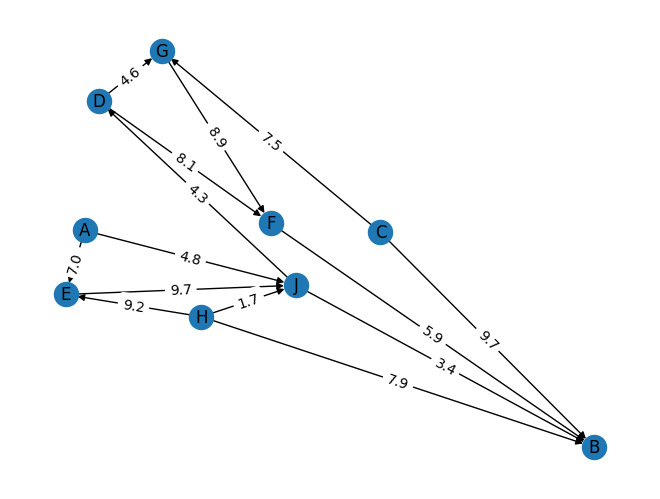

In [26]:
num_edges = 15

node_labels = "ABCDEFGHIJ"
node_list = list(node_labels)
num_nodes = len(node_list)

G = nx.DiGraph()

edges = []

# Generate random edges
for i in range(num_edges):
    source, target = random.sample(node_list, 2)
    weight = round(random.uniform(1,10), 1)
    edge = (source, target, weight)
    edges.append(edge)
    
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
    

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    

# 2. Use the graph from requirement 1 to solve these problems:
 + Display the sparse and dense adjacency matrix of this graph.
 + Display the adjacency list.
 + Calculate the graph diameter.
 + Print the number of in-edges and out-edges of a node which entered from the keyboard.
 + Write a function to print the shortest path of 2 nodes.
 + Write functions to print all in-edges and out-edges of a node.


  (0, 1)	8.9
  (1, 6)	5.9
  (2, 3)	9.7
  (3, 6)	3.4
  (3, 8)	4.3
  (4, 2)	9.2
  (4, 3)	1.7
  (4, 6)	7.9
  (5, 0)	7.5
  (5, 6)	9.7
  (7, 2)	7.0
  (7, 3)	4.8
  (8, 0)	4.6
  (8, 1)	8.1
[[0.  8.9 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  5.9 0.  0. ]
 [0.  0.  0.  9.7 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  3.4 0.  4.3]
 [0.  0.  9.2 1.7 0.  0.  7.9 0.  0. ]
 [7.5 0.  0.  0.  0.  0.  9.7 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  7.  4.8 0.  0.  0.  0.  0. ]
 [4.6 8.1 0.  0.  0.  0.  0.  0.  0. ]]
Graph diameter: 22.1
IN-edges of node B: 3
OUT-edges of node B: 2
Shortest path from A -> B: 
A->J->B
All in-edges of node of node J
E ---> J
H ---> J
A ---> J
All out-edges of node of node J
J ---> B
J ---> D


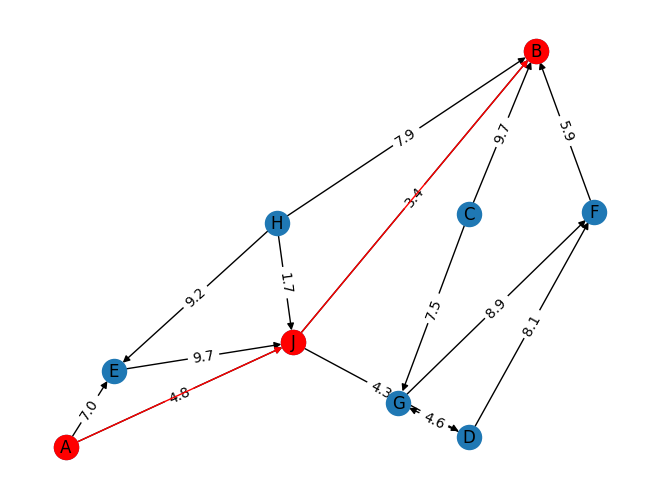

In [87]:
# Sparse adjacency matrix
A = nx.adjacency_matrix(G)
print(A)

# Dense adjacency matrix
A_dense = A.todense()
print(A_dense)

# Pandas format
nx.to_pandas_adjacency(G)

# Calculate graph diameter
# We cannot compute diameter for either 1) a weakly-connected directed graph or 2) a disconnected graph
# There are some acceptable answers:
# 1
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G, weight='weight')])
print(f"Graph diameter: {diameter}")

#2
if nx.is_connected(G.to_undirected()):
    graph_diameter = nx.diameter(G.to_undirected(), weight='weight')
    print(f"Graph diameter: {graph_diameter}")

# Get a vertex’s in-edges: 
print(f"IN-edges of node B: {G.in_degree('J')}")
# Get a vertex’s out-edges:
print(f"OUT-edges of node B: {G.out_degree('J')}")

def shortest_path(source, target):
    path = nx.shortest_path(G,source=source,target=target, weight='weight', method="dijkstra")

    print(f"Shortest path from {source} -> {target}: ")
    print("->".join(map(str, path)))
    
    return path

path = shortest_path("A", "B")

pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r')

# Function to print all in-edges
def print_all_in_edges(G, v):
    print(f"All in-edges of node of node {v}")
    in_edges = G.in_edges(v)
    for (s, t) in in_edges:
        print(f"{s} ---> {t}")

# Function to print all out-edges
def print_all_out_edges(G, v):
    print(f"All out-edges of node of node {v}")
    out_edges = G.out_edges(v)
    for (s, t) in out_edges:
        print(f"{s} ---> {t}")
        
# Print all in-edges
print_all_in_edges(G, "J")

# Print all out-edges
print_all_out_edges(G, "J")
    


# 3. Write a program to read a file containing edge information of an undirected graph and store its dense adjacency matrix into a file.
## Input: a file has format as follow: 
Node1 Node2 Weight<br />
0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2<br />
0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4<br />
0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1<br />
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5<br />
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2<br />
2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6<br />
3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3<br />
4 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2<br />
## Output: a file contains the dense adjacency matrix of this graph.


In [63]:
edge_file = "data/edges.txt"
adj_file = "data/adjacency.xlsx"

f = open(edge_file, "r")

edges = []
for x in f:
    edge_infor = x.split(" ")
    try:
        edge = (int(edge_infor[0]), int(edge_infor[1]), int(edge_infor[2]))
        edges.append(edge)
    except:
        continue

graph = nx.Graph()
    
graph.add_weighted_edges_from(edges)


# Adjacency matrix in Pandas format
data = nx.to_pandas_adjacency(graph)

# Store adjacency matrix into an excel file
data.to_excel(adj_file, sheet_name='data', index=False)
nx.to_pandas_adjacency(graph)

,0,1,2,5,3,4,6
0,0.0,2.0,4.0,1.0,0.0,0.0,0.0
1,2.0,0.0,0.0,2.0,5.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,6.0,0.0
5,1.0,2.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.0,0.0,0.0,0.0,3.0,0.0
4,0.0,0.0,6.0,0.0,3.0,0.0,2.0
6,0.0,0.0,0.0,0.0,0.0,2.0,0.0
